# Used Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise import SVD
from surprise.model_selection import GridSearchCV
import pickle

# Data Loading

In [2]:
# Load data from json file
customers_data = pd.read_json('Data/customers.json')
products_data = pd.read_json('Data/products.json')
ratings_data = pd.read_json('Data/ratings.json')

# Displaying data

In [3]:
# Rename ID column and display customers dataset
customers_data = customers_data.rename(columns={'Id': 'CustomerID'})
display(customers_data)

,CustomerID,NickName
0,103603,1000kgthanh
1,103760,999999999ok
2,103829,ac7ive
3,1,admin
4,103839,ahkk.nguyen
...,...,...
673,103904,yenxaome
674,103610,yoneteru
675,103718,young.che
676,23251,zeatop939


In [4]:
# Rename ID column and display products dataset
products_data = products_data.rename(columns={'Id': 'ProductID'})
display(products_data)

,ProductID,Name,UnitPrice
0,1,Build your own computer,1200.0
1,2,Digital Storm VANQUISH 3 Custom Performance PC,1259.0
2,3,Lenovo IdeaCentre 600 All-in-One PC,500.0
3,4,Apple MacBook Pro 13-inch,1800.0
4,5,Asus N551JK-XO076H Laptop,1500.0
...,...,...,...
686,687,Bird Box,1.0
687,688,Snowpiercer,2.0
688,689,Edge of Tomorrow,1.0
689,690,Ponyo,3.0


In [5]:
# Display ratings dataset
display(ratings_data)

,CustomerID,ProductID,Rate,CreateDate
0,103416,619,1,2018/01/01 01:36:30
1,103654,411,1,2018/01/01 01:36:35
2,103954,298,3,2018/01/01 01:36:38
3,103672,361,5,2018/01/01 01:37:15
4,103960,536,5,2018/01/01 02:36:25
...,...,...,...,...
130749,103907,501,1,2022/03/16 22:25:10
130750,103907,200,1,2022/03/16 22:49:28
130751,103907,184,1,2022/03/16 22:53:35
130752,103907,211,1,2022/03/16 23:14:47


# Data cleaning

# 1. Customer Data

In [6]:
# Check customer data information
display(customers_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  678 non-null    int64 
 1   NickName    678 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.7+ KB


None

In [7]:
# Check for missing values
display(customers_data.isnull().sum())

CustomerID    0
NickName      0
dtype: int64

In [8]:
# Check for duplicates
display(customers_data.duplicated().sum())

0

# 2. Product Data

In [9]:
# Check products data information
display(products_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ProductID  691 non-null    int64  
 1   Name       691 non-null    object 
 2   UnitPrice  691 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 16.3+ KB


None

In [10]:
# Check for missing values
display(products_data.isnull().sum())

ProductID    0
Name         0
UnitPrice    0
dtype: int64

In [11]:
# Check for duplicates
display(products_data.duplicated().sum())

0

# 3. Ratings Data

In [12]:
# Check ratings data information
display(ratings_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130754 entries, 0 to 130753
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   CustomerID  130754 non-null  int64 
 1   ProductID   130754 non-null  int64 
 2   Rate        130754 non-null  int64 
 3   CreateDate  130754 non-null  object
dtypes: int64(3), object(1)
memory usage: 4.0+ MB


None

In [13]:
# Check for missing values
display(ratings_data.isnull().sum())

CustomerID    0
ProductID     0
Rate          0
CreateDate    0
dtype: int64

In [14]:
# Check for duplicates
display(ratings_data.duplicated().sum())

0

# Integration

In [15]:
# Merge ratings data and products data
ratings_products = pd.merge(ratings_data, products_data, on='ProductID', how='left')
display(ratings_products)

,CustomerID,ProductID,Rate,CreateDate,Name,UnitPrice
0,103416,619,1,2018/01/01 01:36:30,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.00
1,103654,411,1,2018/01/01 01:36:35,Diamond Heart Necklace 1/10 ct tw Round-Cut 10...,299.99
2,103954,298,3,2018/01/01 01:36:38,Heart Ring 1/5 ct tw Diamonds 10K Two-Tone Gold,479.00
3,103672,361,5,2018/01/01 01:37:15,Neil Lane Diamond Wedding Band 1/4 ct tw 14K W...,719.99
4,103960,536,5,2018/01/01 02:36:25,Disney Treasures Winnie the Pooh Mother of Pea...,449.99
...,...,...,...,...,...,...
130749,103907,501,1,2022/03/16 22:25:10,Amethyst Heart Necklace With Diamond Accent St...,149.99
130750,103907,200,1,2022/03/16 22:49:28,Promise Ring 1/10 ct tw Diamonds Sterling Silv...,179.00
130751,103907,184,1,2022/03/16 22:53:35,Paper Coffee Cup,0.50
130752,103907,211,1,2022/03/16 23:14:47,Diamond Promise Ring 1/20 ct tw Round-cut Ster...,149.99


In [16]:
# Merge full dataframe
full_data = pd.merge(ratings_products, customers_data, on='CustomerID', how='left')
full_data = pd.DataFrame(full_data)
display(full_data)

,CustomerID,ProductID,Rate,CreateDate,Name,UnitPrice,NickName
0,103416,619,1,2018/01/01 01:36:30,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.00,vanduong0403
1,103654,411,1,2018/01/01 01:36:35,Diamond Heart Necklace 1/10 ct tw Round-Cut 10...,299.99,thutruc.huynh.3
2,103954,298,3,2018/01/01 01:36:38,Heart Ring 1/5 ct tw Diamonds 10K Two-Tone Gold,479.00,ha.n.hien.75
3,103672,361,5,2018/01/01 01:37:15,Neil Lane Diamond Wedding Band 1/4 ct tw 14K W...,719.99,nam.kimcham.1
4,103960,536,5,2018/01/01 02:36:25,Disney Treasures Winnie the Pooh Mother of Pea...,449.99,tuanpkna
...,...,...,...,...,...,...,...
130749,103907,501,1,2022/03/16 22:25:10,Amethyst Heart Necklace With Diamond Accent St...,149.99,minh.nguyentho
130750,103907,200,1,2022/03/16 22:49:28,Promise Ring 1/10 ct tw Diamonds Sterling Silv...,179.00,minh.nguyentho
130751,103907,184,1,2022/03/16 22:53:35,Paper Coffee Cup,0.50,minh.nguyentho
130752,103907,211,1,2022/03/16 23:14:47,Diamond Promise Ring 1/20 ct tw Round-cut Ster...,149.99,minh.nguyentho


In [17]:
# Reorder Columns
new_order = ['CreateDate', 'CustomerID', 'NickName', 'ProductID', 'Name', 'UnitPrice', 'Rate']
full_dataset = full_data[new_order]
display(full_dataset)

,CreateDate,CustomerID,NickName,ProductID,Name,UnitPrice,Rate
0,2018/01/01 01:36:30,103416,vanduong0403,619,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.00,1
1,2018/01/01 01:36:35,103654,thutruc.huynh.3,411,Diamond Heart Necklace 1/10 ct tw Round-Cut 10...,299.99,1
2,2018/01/01 01:36:38,103954,ha.n.hien.75,298,Heart Ring 1/5 ct tw Diamonds 10K Two-Tone Gold,479.00,3
3,2018/01/01 01:37:15,103672,nam.kimcham.1,361,Neil Lane Diamond Wedding Band 1/4 ct tw 14K W...,719.99,5
4,2018/01/01 02:36:25,103960,tuanpkna,536,Disney Treasures Winnie the Pooh Mother of Pea...,449.99,5
...,...,...,...,...,...,...,...
130749,2022/03/16 22:25:10,103907,minh.nguyentho,501,Amethyst Heart Necklace With Diamond Accent St...,149.99,1
130750,2022/03/16 22:49:28,103907,minh.nguyentho,200,Promise Ring 1/10 ct tw Diamonds Sterling Silv...,179.00,1
130751,2022/03/16 22:53:35,103907,minh.nguyentho,184,Paper Coffee Cup,0.50,1
130752,2022/03/16 23:14:47,103907,minh.nguyentho,211,Diamond Promise Ring 1/20 ct tw Round-cut Ster...,149.99,1


In [18]:
# Check dataset information
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130754 entries, 0 to 130753
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CreateDate  130754 non-null  object 
 1   CustomerID  130754 non-null  int64  
 2   NickName    130754 non-null  object 
 3   ProductID   130754 non-null  int64  
 4   Name        130754 non-null  object 
 5   UnitPrice   130754 non-null  float64
 6   Rate        130754 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 8.0+ MB


# Analysis

In [19]:
# Compute average rating per product
average_ratings = full_dataset.groupby('ProductID')['Rate'].mean().reset_index()
average_ratings.columns = ['ProductID', 'AverageRating']
display(average_ratings)

,ProductID,AverageRating
0,1,3.342995
1,2,3.098039
2,3,3.199005
3,4,3.336957
4,5,3.313131
...,...,...
686,687,3.235294
687,688,3.188119
688,689,3.005000
689,690,3.283237


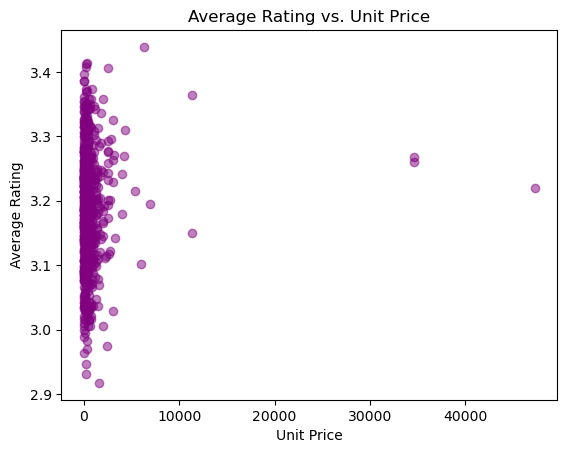

In [20]:
# Averarge Rating versus Unit Price Visualization
plt.scatter(products_data['UnitPrice'], average_ratings['AverageRating'], alpha=0.5, color='purple')
plt.xlabel('Unit Price')
plt.ylabel('Average Rating')
plt.title('Average Rating vs. Unit Price')
plt.show()


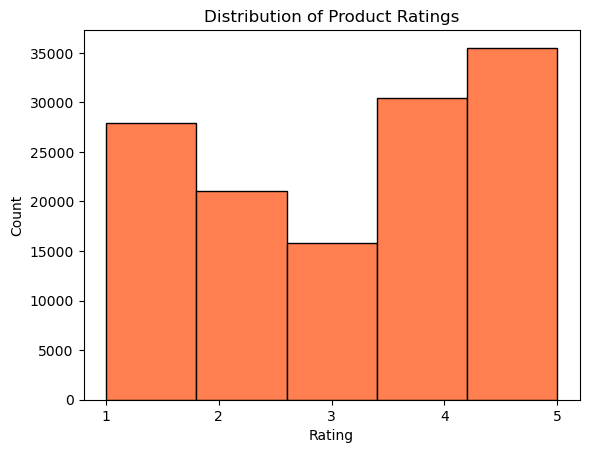

In [21]:
# Produce graph of products Ratings distribution
full_dataset['Rate'].plot.hist(bins=5, color='coral', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Product Ratings')
plt.xticks(range(1, 6))
plt.show()

In [22]:
# Finding top rated products
top_rated_products = average_ratings.nlargest(10, 'AverageRating')
top_rated_products = products_data.loc[products_data['ProductID'].isin(top_rated_products['ProductID']), ['ProductID','Name']]

In [23]:
# Display top rated products
display(top_rated_products)

,ProductID,Name
95,96,Móc khóa BTS phát sáng BTS mẫu B
118,119,Quần Jeans Nữ B&Y
233,234,3-Stone Promise Ring 1/6 ct tw Diamonds Sterli...
425,426,Forever Connected Diamond Necklace 1/3 ct tw P...
435,436,Men's Diamond Mariner Necklace 4 ct tw Round-c...
439,440,Cross Necklace 1/10 ct tw Diamonds Sterling Si...
465,466,Key Necklace 14K Yellow Gold
518,519,Forever Connected Diamond Necklace 1 ct tw Rou...
582,583,Hoop Earrings 14K Yellow Gold
605,606,Disney Treasures The Aristocats Diamond Earrin...


# User-Based Collaborative Filtering

In [24]:
# Create ratings data
ratings_data = full_data[['CustomerID', 'ProductID', 'Rate']]

# Define a reader with the rating scale
reader = Reader(rating_scale=(1, 5))

# Load the dataset from the DataFrame
data = Dataset.load_from_df(ratings_data[['CustomerID', 'ProductID', 'Rate']], reader)


In [25]:
# Perform SVD (Singular Value Decomposition)
algorithm = SVD()

# Perform cross-validation
cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

# Train the dataset and fit the algorithm
trainset = data.build_full_trainset()
algorithm.fit(trainset)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.1875  1.1917  1.1934  1.1909  0.0025  
MAE (testset)     0.8378  0.8398  0.8430  0.8402  0.0021  
Fit time          0.76    0.63    0.69    0.69    0.05    
Test time         0.23    0.18    0.17    0.19    0.02    


In [26]:
# Create a list to store all predictions
predicted_data = []

# Iterate over all users and items
for customer_id in ratings_data['CustomerID'].unique():
    for product_id in ratings_data['ProductID'].unique():
        # Predict the rating
        prediction = algorithm.predict(customer_id, product_id)
        predicted_data.append((customer_id, product_id, prediction.est))

# Convert the predictions list to a DataFrame
predicted_ratings = pd.DataFrame(predicted_data, columns=['CustomerID', 'ProductID', 'Predicted Rating'])
predicted_ratings = pd.merge(predicted_ratings, products_data, on='ProductID', how='left')
display(predicted_ratings)

,CustomerID,ProductID,Predicted Rating,Name,UnitPrice
0,103416,619,2.078581,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.00
1,103416,411,2.260066,Diamond Heart Necklace 1/10 ct tw Round-Cut 10...,299.99
2,103416,298,2.493047,Heart Ring 1/5 ct tw Diamonds 10K Two-Tone Gold,479.00
3,103416,361,2.216943,Neil Lane Diamond Wedding Band 1/4 ct tw 14K W...,719.99
4,103416,536,2.651371,Disney Treasures Winnie the Pooh Mother of Pea...,449.99
...,...,...,...,...,...
237699,103611,499,1.000000,Le Vian Morganite Necklace 1/10 ct tw Diamonds...,1299.99
237700,103611,581,1.058854,Children's Butterfly Hoop Earrings 14K Yellow ...,79.99
237701,103611,512,1.001934,Diamond Solitaire Necklace 1/4 ct tw Round-cut...,629.00
237702,103611,469,1.155916,Diamond Cross Necklace 10K Yellow Gold,339.00


# Hyperparameter Tuning

In [27]:
# Define a parameter grid to search
parameters = {
    'n_factors': [50, 100, 150],
    'n_epochs': [20, 30],
    'lr_all': [0.005, 0.01],
    'reg_all': [0.02, 0.05]
}

# Initialize the grid search
grid_search = GridSearchCV(SVD, parameters, measures=['rmse', 'mae'], cv=3)

# Fit the grid search to the data
grid_search.fit(data)

# Best RMSE score
print(grid_search.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(grid_search.best_params['rmse'])

1.090543699852909
{'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.05}


# Model optimizing

In [28]:
# Instantiate the SVD model with the optimal hyperparameters
optimal_svd = SVD(n_factors=50, n_epochs=20, lr_all=0.005, reg_all=0.05)

# Perform cross-validation
cross_validate(optimal_svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

# Train the dataset and fit the algorithm
trainset = data.build_full_trainset()
optimal_svd.fit(trainset)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0965  1.0839  1.0907  1.0903  0.0052  
MAE (testset)     0.7988  0.7910  0.7956  0.7951  0.0032  
Fit time          0.63    0.79    1.04    0.82    0.17    
Test time         0.22    0.21    0.75    0.40    0.25    


In [32]:
# Create a list to store all predictions
new_predicted_data = []

# Iterate over all users and items
for customer_id in ratings_data['CustomerID'].unique():
    for product_id in ratings_data['ProductID'].unique():
        # Predict the rating
        prediction = optimal_svd.predict(customer_id, product_id)
        new_predicted_data.append((customer_id, product_id, prediction.est))

# Create a new dataframe with new predictions
new_predicted_ratings = pd.DataFrame(new_predicted_data, columns=['CustomerID', 'ProductID', 'Predicted Rating'])

# Save predicted ratings
new_predicted_ratings.to_csv('Predicted ratings.csv', index=False)
print('Predicted ratings was succesfully saved')

Predicted ratings was succesfully saved


# Saving the model

In [33]:
with open('Recommendation Model.pkl', 'wb') as file:
    pickle.dump(optimal_svd, file)
    print('Model was succesfully saved')

Model was succesfully saved


# Results Mannual Check

In [36]:
# Example Usage
user_id = 103416
products_number = 10

# Filter for the requested user ID 
rated_products = ratings_data[ratings_data['CustomerID'] == user_id]['ProductID'].unique()
user_recommendations = new_predicted_ratings[new_predicted_ratings['CustomerID'] == user_id]
new_recommendations = user_recommendations[~user_recommendations['ProductID'].isin(rated_products)]
top_recommendations = new_recommendations.sort_values(by='Predicted Rating', ascending=False).head(products_number)

# Generate recommendations for the requested user
output = list(zip(top_recommendations['ProductID'], top_recommendations['Predicted Rating']))

# Display the recommendations
for product_id, rating in output:
    print(f"Product ID: {product_id} - Predicted Rating: {rating}")


Product ID: 546 - Predicted Rating: 2.3962216865370345
Product ID: 466 - Predicted Rating: 2.3764758285825884
Product ID: 77 - Predicted Rating: 2.362791544558142
Product ID: 126 - Predicted Rating: 2.3483524119471566
Product ID: 414 - Predicted Rating: 2.347026335508013
Product ID: 212 - Predicted Rating: 2.343483536201222
Product ID: 100 - Predicted Rating: 2.3422152901449724
Product ID: 275 - Predicted Rating: 2.3381505222062513
Product ID: 354 - Predicted Rating: 2.336935540549495
Product ID: 563 - Predicted Rating: 2.3331551453783264
